In [245]:
import os
import json
import matplotlib
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import random

In [364]:
!pwd

/home/liang/internship/NeuroNER/NeuroNER-master/data/rpi/test/result


In [365]:
# load Stanford NER result and merge them
file_path = '/home/liang/internship/EDL-2018/result/RPI_2018_statistic_all_1235_data.csv'
df_stanfordner = pd.DataFrame.from_csv(file_path).sort_values('n_sentence')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


In [366]:
# checking how much entities are done by now
ls_sorted_all_entities = df_stanfordner['entity_type'].tolist()
running_entity ='Parlance107081177'
now = ls_sorted_all_entities.index(running_entity) - 1
print('%5d/1235 entities are done'%(now))

# extract the finisth entities:
ls_entities = ls_sorted_all_entities[5:now]

  787/1235 entities are done


In [367]:
# extract and load result from NeuroNER report
def Extract_result(ls_entity, data_path='NeuroNER/'):
# data_path = 'NeuroNER/'
    
    # extract from raw
    ls_n_epoch = []
    ls_train_duration = []
    ls_train_F1 = []
    ls_valid_F1 = []
    ls_vs_epoch = []

    for entity in ls_entity:
        output_path = data_path + entity +'/output/'
        folder_name = list(os.walk(output_path))[0][1][0]
        result_file_name = output_path + folder_name +'/results.json'
        with open(result_file_name ,'r') as f:
            result = json.load(f)
        ls_n_epoch.append(int(result['execution_details']['num_epochs']))
        ls_train_duration.append(int(result['execution_details']['train_duration']))
        ls_train_F1.append(result['train']['best_f1_conll'])
        ls_valid_F1.append(result['valid']['best_f1_conll'])
        temp =[]
        for i in range(int(result['execution_details']['num_epochs'])+1):
            temp.append(result['epoch'][str(i)][0]['valid']['f1_conll']['micro'])
        ls_vs_epoch.append(temp)
        
    # create dataframe
    df_NeuroNER = pd.DataFrame({'entity_type':ls_entity,'Neuro_n_epochs':ls_n_epoch,'Neuro_duration':ls_train_duration,
                                'Neuro_F1_on_train_set':ls_train_F1,'Neuro_F1_on_valid_set':ls_valid_F1})
    df_NeuroNER = df_NeuroNER[['entity_type', 'Neuro_n_epochs', 'Neuro_duration', 'Neuro_F1_on_train_set', 
                               'Neuro_F1_on_valid_set']]        
    
    return df_NeuroNER, ls_vs_epoch


In [368]:
df_NeuroNER, ls_vs_epoch= Extract_result(ls_entities)

# select the finished entities
df_merge1 = df_en.sort_values('n_sentence')[5:now]
df_merge1 = df_merge1.rename(index=str, columns={"F1_mean": "F1_Stanford", "F1_std": "F1_Stanford_std"})
df_all= pd.merge(df_merge1,df_NeuroNER, on="entity_type").drop(['n_document','F1_Stanford_std','n_token','n_entity','FN_mean','FP_mean', 'TP_mean','P_mean','R_mean'], axis=1)

# merge old data
file_path = 'thirdteen_entities.csv'
df_5 = pd.DataFrame.from_csv(file_path).sort_values('n_sentence')
df_all = pd.concat([df_5[:5], df_all], axis=0, ignore_index=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  # Remove the CWD from sys.path while we load stuff.


In [374]:
df_all.to_csv('data_by_now.csv')
df_all.from_csv('data_by_now.csv')
df_all.head(10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,entity_type,n_sentence,F1_Stanford,Neuro_n_epochs,Neuro_duration,Neuro_F1_on_train_set,Neuro_F1_on_valid_set
0,Belemnite101973723,84,0.91580,15,71,97.89,93.02
1,PlanetaryNebula109394797,88,0.81528,27,130,90.41,78.26
2,Threadfin102610980,93,0.61946,15,76,84.28,66.67
3,Bumblebee102209624,98,0.71124,20,107,80.00,77.42
4,DestroyerEscort103180732,100,0.80776,18,94,85.19,87.50
5,Basin109215437,106,0.63452,16,91,87.50,75.86
6,Cirque109245515,106,0.63452,19,107,86.86,77.97
7,EmploymentAgency108354352,120,0.23568,27,152,79.33,60.47
8,Tunic104497570,120,0.66038,21,105,88.04,90.91
9,Chiton103021121,120,0.66038,28,138,88.21,90.91


# check the convergence
* From this cell, you can randomly choose entities and plot their F1_score against epochs 
* since we have some kind of shorter tolerant(to shorten the training time) and the some entities have lower sentence size so the F1_vs_epochs for some entities is quite flactuate
* so the following cell just give you a quick way to have a idea how entities converge in this trail.
* how the stop metric work.
* in the legend :(entitiy name, number of sentence)

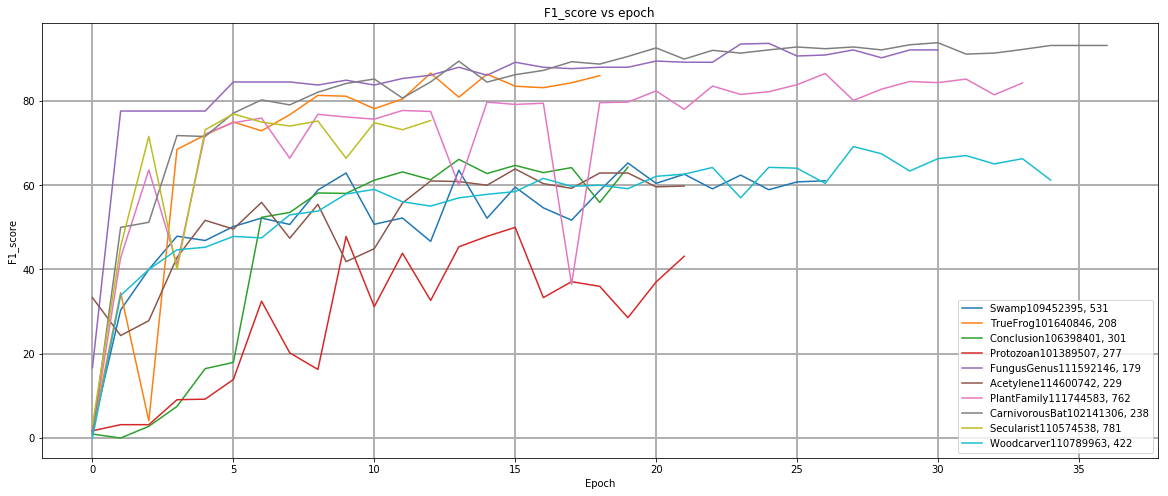

In [382]:
# check the convergence
# randomly choosing entities
n_entity = len(ls_vs_epoch)
ls_entities = []
ls_epoch = []
for i in range(10):
    index = random.randint(0,n_entity - 1)
    ls_epoch.append(ls_vs_epoch[index])
    ls_entities.append(df_NeuroNER.iloc[index]['entity_type'])

# plot the accuracy against the degree# plot th 
plt.figure(figsize=(20,8))
for i,entity in enumerate(ls_entities):
    x = list(range(len(ls_epoch[i])))
    y = ls_epoch[i]
    n_sentence = int(df_all[df_all['entity_type'] == entity]['n_sentence'])
    label = entity + ', ' + str(n_sentence)
    plt.plot(x,y, label = label)
#     print(entity)
plt.title("F1_score vs epoch")
plt.xlabel("Epoch")
plt.ylabel("F1_score")
plt.grid(linestyle='-', linewidth=2)
plt.legend()
plt.show()


## Compare the F1 between StanfordNER and NeuroNER

* the entities is sorted by the number of sentence, like entities in the left have less sentence size.
* reuslt of StanfordNER(Red) and NeuroNER(Blue) overlap in the same x position, 
    * so the if edge is red, means StanfordNER better than NeuroNER, otherwise it is blue
    * still keep that StanfordNER is average from 5-fold CV but NeuroNER just one
    
* some of entities are almost convergence while still increasing silghtly and slowly, like CarnivorousBat(gray), it was stop by the NeuroNER default stop metric. (so in the below graph to compare the F1 with Stanford NER, some NeuroNER result could be a slihtly higher)

* some entities seem still no convergence, flactuating a lot, but since no improvement in validation for a while (7 epochs) them are stop by the NeuroNER default stop metric.(Protozoan, red, with few sentence size)

* that is what i means the default stop metric by NeuroNER maybe not fit very well for RPI data, since some entities don't have very enough data for a NeuroNER, and the data are little noisy.

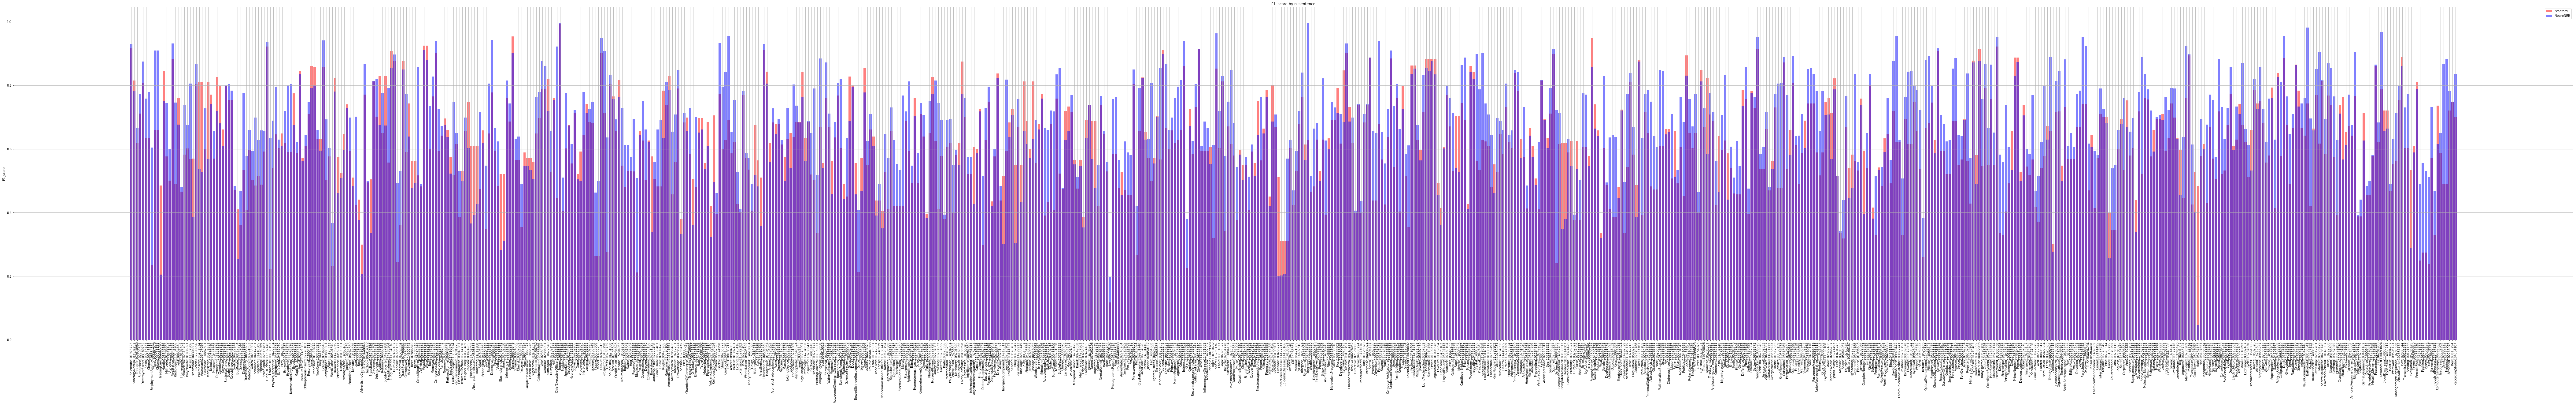

In [378]:
# data
bars1 = df_all['F1_Stanford']
bars2 = df_all['Neuro_F1_on_valid_set']/100
y_pos = np.arange(len(bars1))


fig, ax = plt.subplots(figsize=(150,20)) 
plt.bar(y_pos, bars1, align='center', color = 'r', alpha=0.5, label = 'Stanford')
plt.bar(y_pos,bars2, color = 'b', alpha=0.5,  label = 'NeuroNER')


plt.xticks(y_pos, df_all['entity_type'],rotation='vertical')
plt.ylabel('F1_score')
plt.title('F1_score by n_sentence')

plt.grid()
plt.legend()
plt.savefig('overlap.pdf')
plt.show()


#### StanfordNER - NeuroNER
 * postive bar means StanfordNER better than NeuroNER, otherwise it is blue

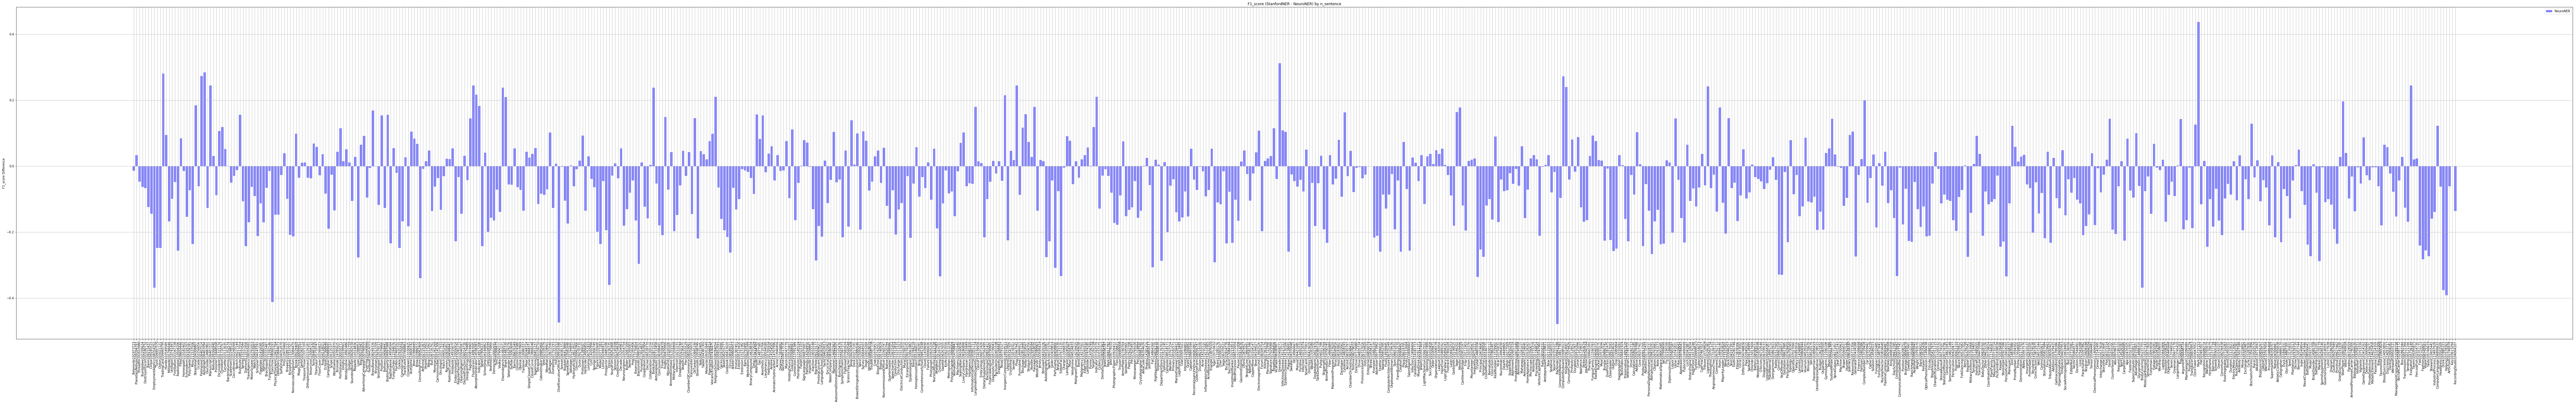

In [379]:
# data
bars1 = df_all['F1_Stanford']
bars2 = df_all['Neuro_F1_on_valid_set']/100
bars3 = bars1 - bars2
y_pos = np.arange(len(bars1))


fig, ax = plt.subplots(figsize=(150,20))


plt.bar(y_pos,bars3, color = 'b', alpha=0.5,  label = 'NeuroNER')


plt.xticks(y_pos, df_all['entity_type'],rotation='vertical')
plt.ylabel('F1_score Difference')
plt.title('F1_score (StanfordNER - NeuroNER) by n_sentence')

plt.grid()
plt.legend()
plt.savefig('substract.pdf')



we can find that:
    * Stanford are better for some entities, and for others NeuroNER is better, but NeuroNER have more better result then Stanford.
    * for thoes entities with more sentence, NeuroNER is more like to performance better.(right part of the figure)

### Plot the training duration vs entities
* he entities is sorted by the number of sentence, like entities in the left have less sentence size.

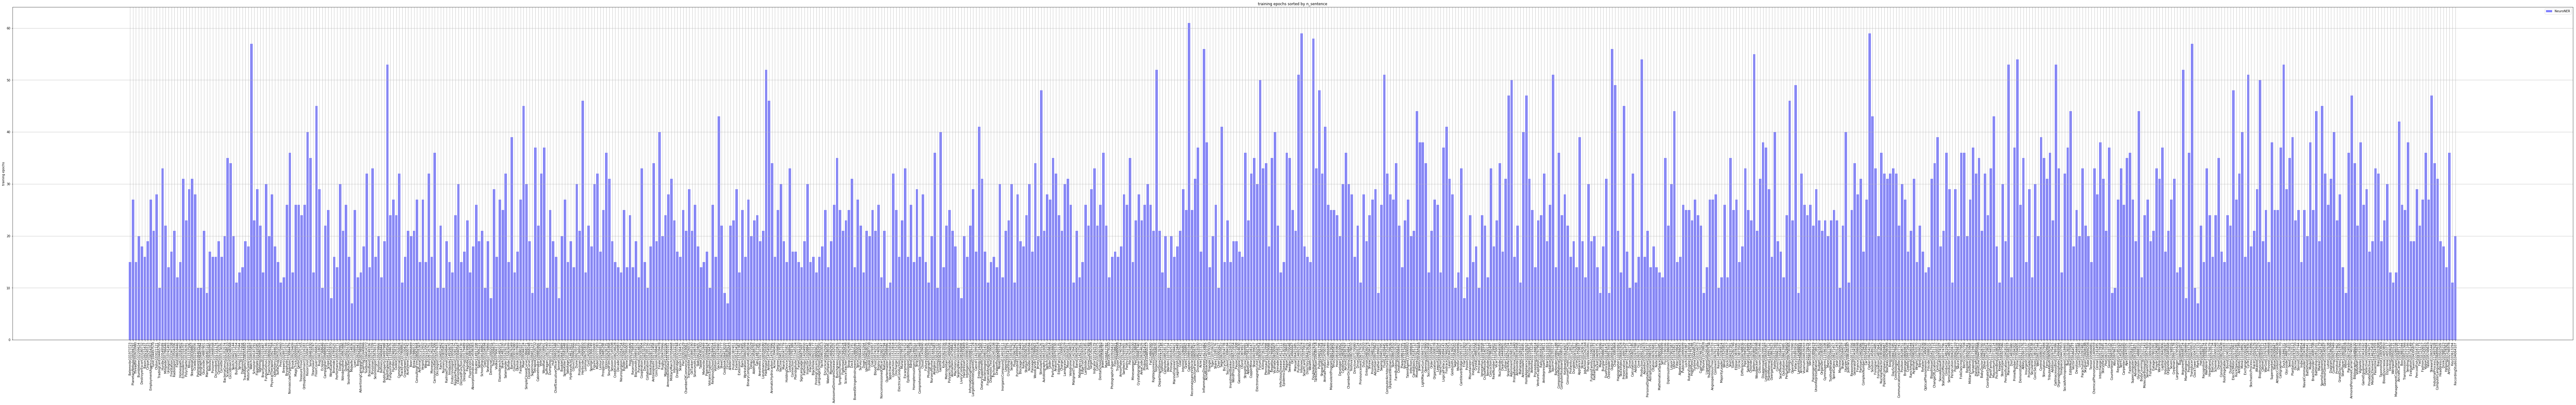

In [380]:
# data
bars1 = df_all['Neuro_n_epochs']
y_pos = np.arange(len(bars1))

fig, ax = plt.subplots(figsize=(150,20))
plt.bar(y_pos,bars1, color = 'b', alpha=0.5,  label = 'NeuroNER')


plt.xticks(y_pos, df_all['entity_type'],rotation='vertical')
plt.ylabel('training epochs')
plt.title('training epochs sorted by n_sentence')

plt.grid()
plt.legend()
plt.savefig('epochs.pdf')

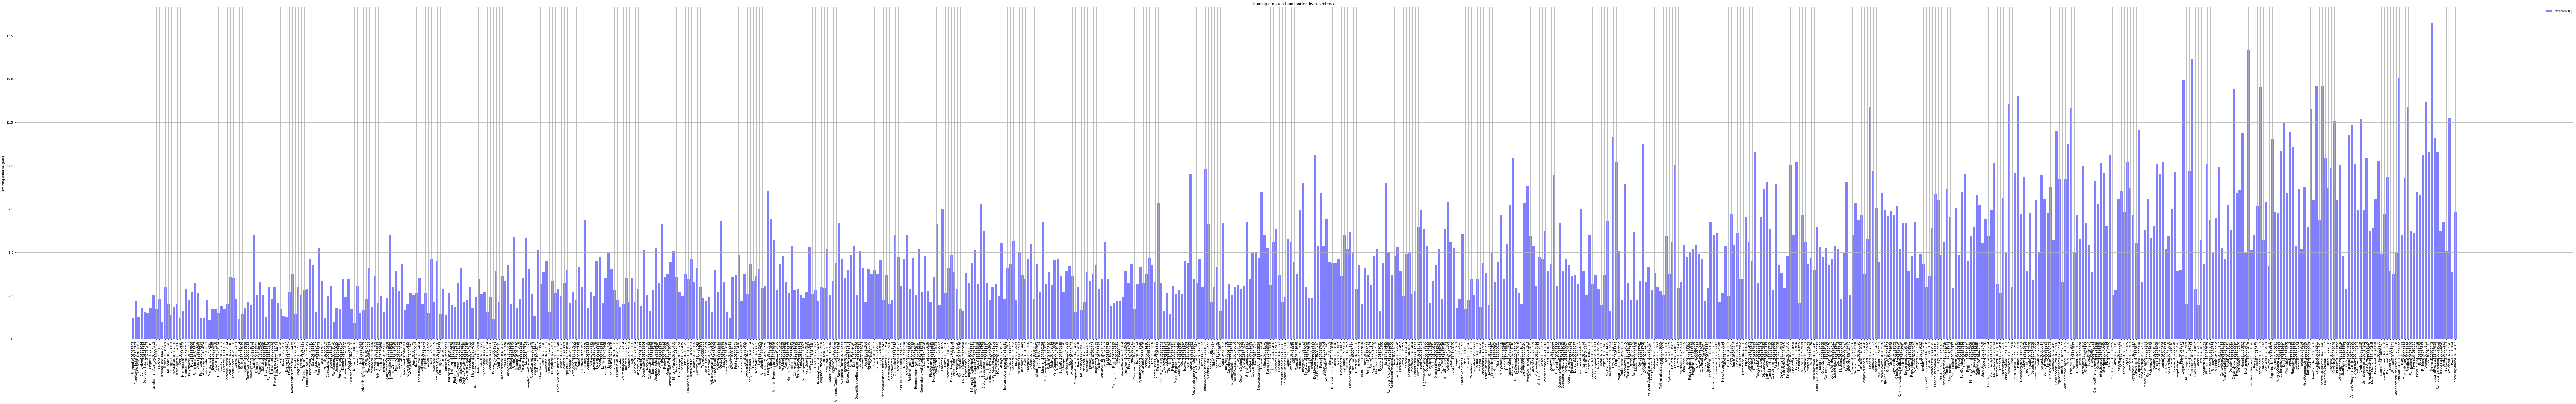

In [381]:
# data
bars1 = df_all['Neuro_duration']/60
y_pos = np.arange(len(bars1))

fig, ax = plt.subplots(figsize=(150,20))
plt.bar(y_pos,bars1, color = 'b', alpha=0.5,  label = 'NeuroNER')


plt.xticks(y_pos, df_all['entity_type'],rotation='vertical')
plt.ylabel('training duration (min)')
plt.title('training duration (min) sorted by n_sentence')

plt.grid()
plt.legend()
plt.savefig('duration.pdf')

from above two plots we can find that :
    * during to our stop metric, number of epoch of the entity seems have no clear relationship with number of sentence.(first figure)
    * but for entities with more sentence, we tend to have more training duration, longer time in each epoch.(second figure)